<a href="https://colab.research.google.com/github/kritp144/CreditCard-Approval/blob/main/Project2_Pt3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PROJECT 2

KRIT PATEL

# CREDIT CARD APPROVAL:

The Task of this project is to create a prediction model that will determine whether or not a person gets approved for a credit card. The data was from Kaggle belonging to a UCI machine learning repository.

Source: https://www.kaggle.com/datasets/samuelcortinhas/credit-card-approval-clean-data?select=clean_dataset.csv

# Importing Libraries and Loading the Data

In [ ]:
# Import Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_selector, make_column_transformer

In [ ]:
# Loading the Data

data = '/content/drive/MyDrive/DATA SCIENCE/Project 2 Datasets/creditcard.csv'

df = pd.read_csv(data)

df.head()

,Gender,Age,Debt,Married,BankCustomer,Industry,Ethnicity,YearsEmployed,PriorDefault,Employed,CreditScore,DriversLicense,Citizen,ZipCode,Income,Approved
0,1,30.83,0.000,1,1,Industrials,White,1.25,1,1,1,0,ByBirth,202,0,1
1,0,58.67,4.460,1,1,Materials,Black,3.04,1,1,6,0,ByBirth,43,560,1
2,0,24.50,0.500,1,1,Materials,Black,1.50,1,0,0,0,ByBirth,280,824,1
3,1,27.83,1.540,1,1,Industrials,White,3.75,1,1,5,1,ByBirth,100,3,1
4,1,20.17,5.625,1,1,Industrials,White,1.71,1,0,0,0,ByOtherMeans,120,0,1


# Pre Cleaning Data Analysis

In [ ]:
# Check the Size of the Data

print('Rows, Columns')
df.shape 

Rows, Columns


(690, 16)

In [ ]:
# Check for Duplicates

print('Duplicated Values:')
df.duplicated().sum()

Duplicated Values:


0

In [ ]:
# Check the Data types and missing values of each column

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690 entries, 0 to 689
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Gender          690 non-null    int64  
 1   Age             690 non-null    float64
 2   Debt            690 non-null    float64
 3   Married         690 non-null    int64  
 4   BankCustomer    690 non-null    int64  
 5   Industry        690 non-null    object 
 6   Ethnicity       690 non-null    object 
 7   YearsEmployed   690 non-null    float64
 8   PriorDefault    690 non-null    int64  
 9   Employed        690 non-null    int64  
 10  CreditScore     690 non-null    int64  
 11  DriversLicense  690 non-null    int64  
 12  Citizen         690 non-null    object 
 13  ZipCode         690 non-null    int64  
 14  Income          690 non-null    int64  
 15  Approved        690 non-null    int64  
dtypes: float64(3), int64(10), object(3)
memory usage: 86.4+ KB


In [ ]:
# Check for min and max values in numerical data

# Check for min and max age 
print('Min Age:', df['Age'].min())
print('Max Age:', df['Age'].max())

# Check for min and max years employed
print('Min Years of Employment:', df['YearsEmployed'].min())
print('Max Years of Employment:', df['YearsEmployed'].max())

# Check for min and max years employed
print('Min Debt:', df['Debt'].min())
print('Max Debt:', df['Debt'].max())

# Check for min and max years employed
print('Min Credit Score:', df['CreditScore'].min())
print('Max Credit Score:', df['CreditScore'].max())

Min Age: 13.75
Max Age: 80.25
Min Years of Employment: 0.0
Max Years of Employment: 28.5
Min Debt: 0.0
Max Debt: 28.0
Min Credit Score: 0
Max Credit Score: 67


In [ ]:
# Check for Categories in each Categorical columns

# Gender
print('Gender:')
print(df['Gender'].value_counts())

# Married
print('Married:')
print(df['Married'].value_counts())

# Bank Customer
print('Bank Customer:')
print(df['BankCustomer'].value_counts())

# Industy
print('Industry:')
print(df['Industry'].value_counts())

# Ethnicity
print('Ethnicity:')
print(df['Ethnicity'].value_counts())

# Prior Default
print('Prior Default:')
print(df['PriorDefault'].value_counts())

# Employed
print('Employed:')
print(df['Employed'].value_counts())

# Credit Score
print('Credit Score:')
print(df['CreditScore'].value_counts())

# Drivers License
print('Drivers License:')
print(df['DriversLicense'].value_counts())

# Citizen
print('Citizen:')
print(df['Citizen'].value_counts())

# Approved
print('Approved:')
print(df['Approved'].value_counts()) 

Gender:
1    480
0    210
Name: Gender, dtype: int64
Married:
1    525
0    165
Name: Married, dtype: int64
Bank Customer:
1    527
0    163
Name: BankCustomer, dtype: int64
Industry:
Energy                   146
Materials                 78
Industrials               64
ConsumerDiscretionary     59
ConsumerStaples           54
Healthcare                53
Financials                51
InformationTechnology     41
CommunicationServices     38
Utilities                 38
Real Estate               30
Education                 25
Research                  10
Transport                  3
Name: Industry, dtype: int64
Ethnicity:
White     408
Black     138
Asian      59
Latino     57
Other      28
Name: Ethnicity, dtype: int64
Prior Default:
1    361
0    329
Name: PriorDefault, dtype: int64
Employed:
0    395
1    295
Name: Employed, dtype: int64
Credit Score:
0     395
1      71
2      45
3      28
6      23
11     19
5      18
7      16
4      15
9      10
8      10
10      8
14      8
12 

# DATA CLEANING 

There are no duplicated values, missing values or inconsistencies.

All Ordinal values have already been Ordinally Encoded.

Categorical Values in 'Ethnicity' and 'Citizen' column needs to be OneHotEncoded.

Numerical Values will all be scaled using a StandardScaler.

'Industry' and 'ZipCode' columns needs to be dropped as it isn't important to predict whether or not someone should get approved for a credit card based on the Industry they work in. Same applies to the Zip Code.

In [ ]:
# Define the Features as X and the Target as y

X = df.drop(columns= ['Industry', 'ZipCode', 'Approved'])
y = df['Approved'] 

In [ ]:
X.head() 

,Gender,Age,Debt,Married,BankCustomer,Ethnicity,YearsEmployed,PriorDefault,Employed,CreditScore,DriversLicense,Citizen,Income
0,1,30.83,0.000,1,1,White,1.25,1,1,1,0,ByBirth,0
1,0,58.67,4.460,1,1,Black,3.04,1,1,6,0,ByBirth,560
2,0,24.50,0.500,1,1,Black,1.50,1,0,0,0,ByBirth,824
3,1,27.83,1.540,1,1,White,3.75,1,1,5,1,ByBirth,3
4,1,20.17,5.625,1,1,White,1.71,1,0,0,0,ByOtherMeans,0


In [ ]:
# Define the Colomn Selector

num_selector = make_column_selector(dtype_include= 'number')
cat_selector = make_column_selector(dtype_include= 'object')

In [ ]:
# Define the scaler and OneHotEncoder

scaler = StandardScaler()

ohe =  OneHotEncoder(sparse= False, handle_unknown= 'ignore')

In [ ]:
# Create appropriate pipelines

num_pipe = make_pipeline(scaler)
cat_pipe = make_pipeline(ohe)

In [ ]:
# Fit the pipelines and coloumn selectors in a tuple

num_tuple = (num_pipe, num_selector)
cat_tuple = (cat_pipe, cat_selector) 

In [ ]:
# Fit the tuples into the column transformer

preprocessor = make_column_transformer(num_tuple, cat_tuple)
preprocessor

ColumnTransformer(transformers=[('pipeline-1',
                                 Pipeline(steps=[('standardscaler',
                                                  StandardScaler())]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7f9728d87e90>),
                                ('pipeline-2',
                                 Pipeline(steps=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False))]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7f9728d873d0>)])

# UNIVARIANT DATA VISUALIZATION

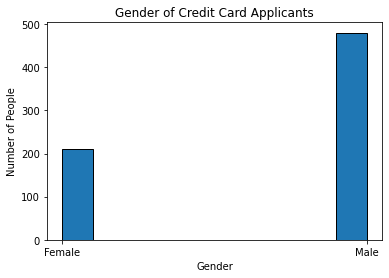

In [ ]:
# Histogram showing Gender

plt.hist(X['Gender'],
         edgecolor= 'Black');

plt.title('Gender of Credit Card Applicants');
plt.xlabel('Gender');
plt.ylabel('Number of People');

plt.xticks([0,1],['Female', 'Male']);

This graph shows us that we have more male clients than female, which may possibly create a bias when determining approval for credit cards

Text(0, 0.5, 'Number of People')

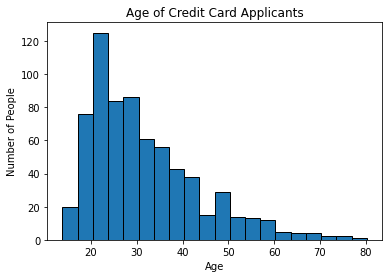

In [ ]:
# Histogram showing Age of Applicants

plt.hist(X['Age'],
         edgecolor= 'Black',
         bins= 'auto');

plt.title('Age of Credit Card Applicants')
plt.xlabel('Age')
plt.ylabel('Number of People')


This graph shows us that majority of the applicant age is under 60 with a few outliers over the age of 70

Text(0, 0.5, 'Number of People')

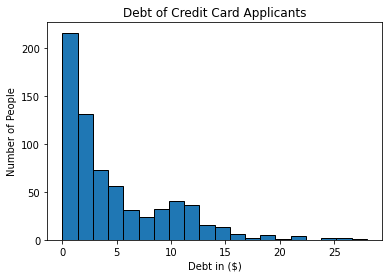

In [ ]:
# Histogram showing Debt of Applicants

plt.hist(df['Debt'],
         edgecolor= 'Black',
         bins= 'auto')

plt.title('Debt of Credit Card Applicants')
plt.xlabel('Debt in ($)')
plt.ylabel('Number of People')

This graph shows us that most applicants have debt under 15 dollars with a few outliers over 25 dollars

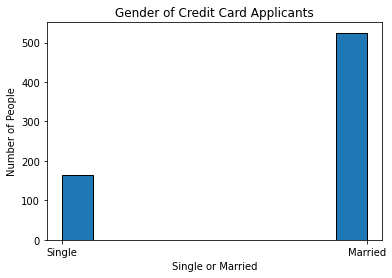

In [ ]:
# Histogram showing Married

plt.hist(X['Married'],
         edgecolor= 'Black');

plt.title('Gender of Credit Card Applicants');
plt.xlabel('Single or Married');
plt.ylabel('Number of People');

plt.xticks([0,1],['Single', 'Married']);

This data shows us whether or not the applicants are married or single. We can see that most of the applicants are married and therefore there may be a bias towards married when making predictions for approval

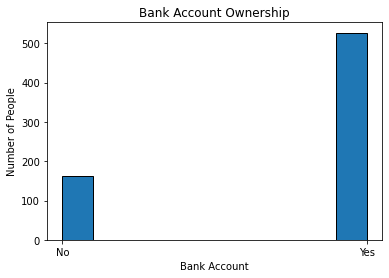

In [ ]:
# Histogram showing whether or not an applicant has a bank account

plt.hist(X['BankCustomer'],
         edgecolor= 'Black');

plt.title('Bank Account Ownership');
plt.xlabel('Bank Account');
plt.ylabel('Number of People');

plt.xticks([0,1],['No', 'Yes']);

This graph shows us whether or not the applicants have a bank account. The data here is skewed towards yes and therefore may have a bias towards it. 

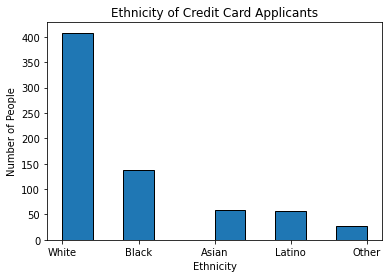

In [ ]:
# Histogram showing Ethnicity

plt.hist(X['Ethnicity'],
         edgecolor= 'Black');

plt.title('Ethnicity of Credit Card Applicants');
plt.xlabel('Ethnicity');
plt.ylabel('Number of People');



This graph shows us the diversity of applicants based on their Ethnicity. This dataset shows us that most of clients are caucasian or african american and therefore may have a bias towards those two ethnicities when predicting for approval.

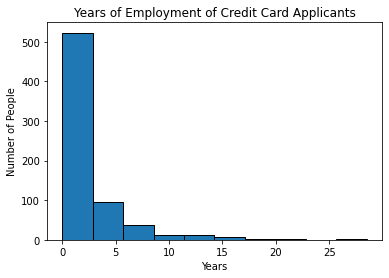

In [ ]:
# Histogram showing Years of Emplyment

plt.hist(X['YearsEmployed'],
         edgecolor= 'Black');

plt.title('Years of Employment of Credit Card Applicants');
plt.xlabel('Years');
plt.ylabel('Number of People');


This graph shows us that most of the applicants are fairly newly employed with a few outliers with that have been employed over 20 years

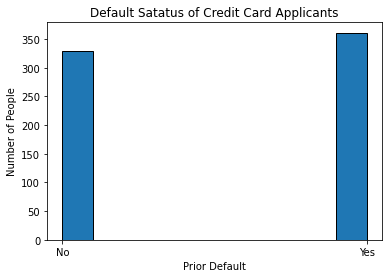

In [ ]:
# Histogram showing Prior Default

plt.hist(X['PriorDefault'],
         edgecolor= 'Black');

plt.title('Default Satatus of Credit Card Applicants');
plt.xlabel('Prior Default');
plt.ylabel('Number of People');

plt.xticks([0,1],['No', 'Yes']);

This shows us that we have the applicants who have defaulted a payment vs those that have not, is weighted pretty evenly. No bias here

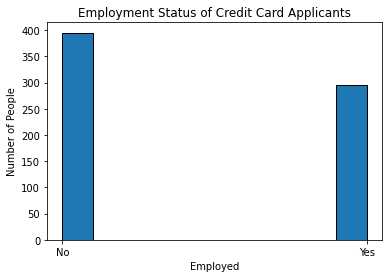

In [ ]:
# Histogram showing if applicants are Employed

plt.hist(X['Employed'],
         edgecolor= 'Black');

plt.title('Employment Status of Credit Card Applicants');
plt.xlabel('Employed');
plt.ylabel('Number of People');

plt.xticks([0,1],['No', 'Yes']);

This shows us that more applicants are unemployed than employed. May skew bias slightly when predicting for approval.

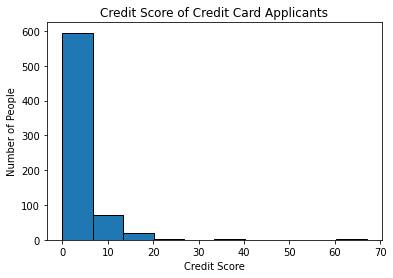

In [ ]:
# Histogram showing Credit Score

plt.hist(X['CreditScore'],
         edgecolor= 'Black');

plt.title('Credit Score of Credit Card Applicants');
plt.xlabel('Credit Score');
plt.ylabel('Number of People');

This graph shows us that majority of our data set has a low credit score. 

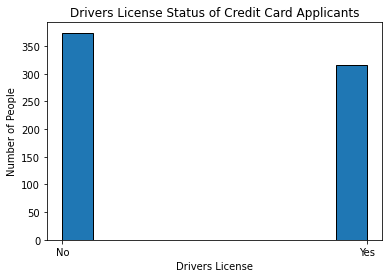

In [ ]:
# Histogram showing if applicants have a Drivers License

plt.hist(X['DriversLicense'],
         edgecolor= 'Black');

plt.title('Drivers License Status of Credit Card Applicants');
plt.xlabel('Drivers License');
plt.ylabel('Number of People');

plt.xticks([0,1],['No', 'Yes']);

This graph shows us that the data is pretty balanced on whether or not the applicants have a drivers license

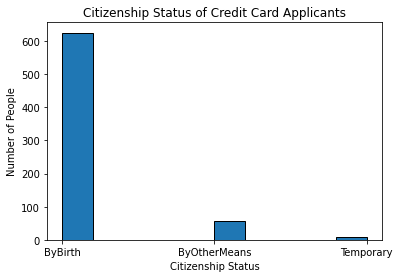

In [ ]:
# Histogram showing if applicants are Citizens

plt.hist(X['Citizen'],
         edgecolor= 'Black');

plt.title('Citizenship Status of Credit Card Applicants');
plt.xlabel('Citizenship Status');
plt.ylabel('Number of People');



This graph shows us that the data is very highly skewed towards applicants who obtained their citizenship by birth. This could influence a bias towards that when predicting for approval.

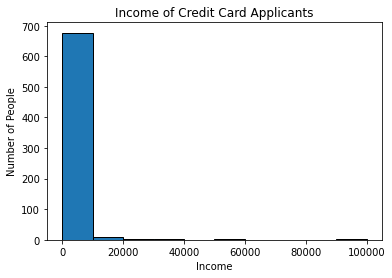

In [ ]:
# Histogram showing Income of Applicants

plt.hist(X['Income'],
         edgecolor= 'Black');

plt.title('Income of Credit Card Applicants');
plt.xlabel('Income');
plt.ylabel('Number of People');


This graph shows the income of applicants. There seems to be a very high bias towards people earning less than 20,000 dollars. This may influence the predictions on approval.

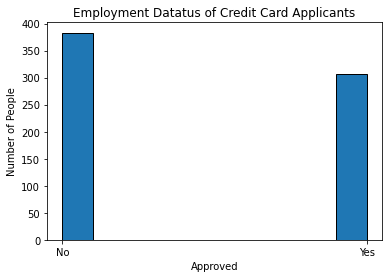

In [ ]:
# Histogram showing if applicants are Approved

plt.hist(y,
         edgecolor= 'Black');

plt.title('Employment Datatus of Credit Card Applicants');
plt.xlabel('Approved');
plt.ylabel('Number of People');

plt.xticks([0,1],['No', 'Yes']);

This graph shows us that more people got denied for a credit card than approved. 

# Correlation Graph

In [ ]:
# Correlate the data

corr = df.corr() 

<Figure size 1440x1080 with 0 Axes>

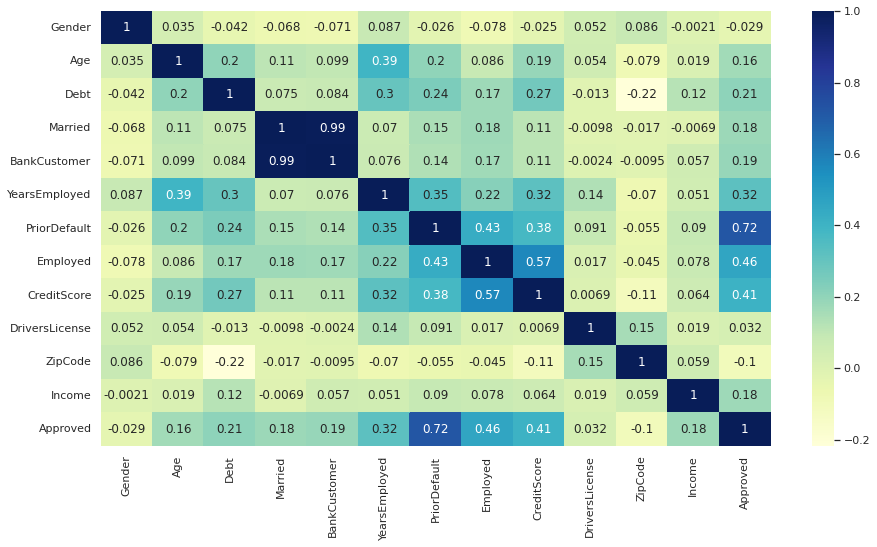

<Figure size 1440x1080 with 0 Axes>

In [ ]:
# Make a heatmap

sns.heatmap(corr, cmap = 'YlGnBu', annot= True);
plt.figure(figsize = (20,15))

This heat map shows the correlation within the data. Strong correlations are shown by the blues, weak corrrelations are shown in yellow. This graph shows us that there is a strong correlation between 'Credit Score' and whether or not a person is 'Employed'. There is also a strong correlation between 'Approval' and 'Prior Default'. This means that when we predict for approval, there will be bias present based on whether or not a person has a prior default.

# Multivariate Exploratory Visualization

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


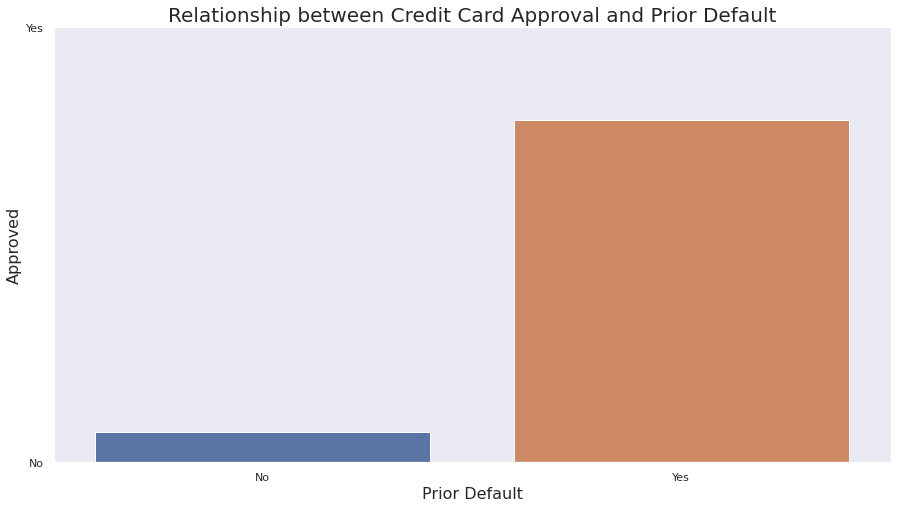

In [161]:
# Approval based on Prior Defaults

ax = sns.barplot(X['PriorDefault'],y,
                 ci= 0);

plt.title('Relationship between Credit Card Approval and Prior Default', fontsize= 20);
plt.xlabel('Prior Default', fontsize= 16);
plt.ylabel('Approved', fontsize= 16);
plt.xticks([0,1],['No','Yes']);
plt.yticks([0,1],['No','Yes']);


This barchart shows us most applicants with a prior default have a good chance getting a credit card approved. It also shows us that if an applicant does not have prior defaults, it is very unlikely hat the applicant would be denied approval for a credit card. 

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


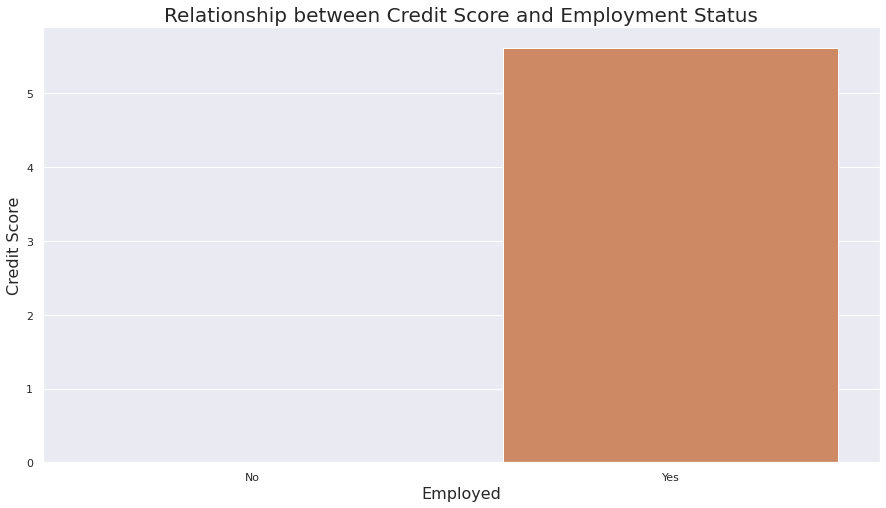

In [162]:
# Credit Score based on Employment Status

ax = sns.barplot(X['Employed'],X['CreditScore'],
                 ci= 0);

plt.title('Relationship between Credit Score and Employment Status', fontsize= 20);
plt.xlabel('Employed', fontsize= 16);
plt.ylabel('Credit Score', fontsize= 16);
plt.xticks([0,1],['No', 'Yes']);


This barchart show us that only people who are employed have been assigned a credit score higher than 0, while those who are unemployed have been assigned a credit score of 0. This would create a bias towards those employed if those two features are used to predict credit card approval.

# Stakeholder Visualization

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


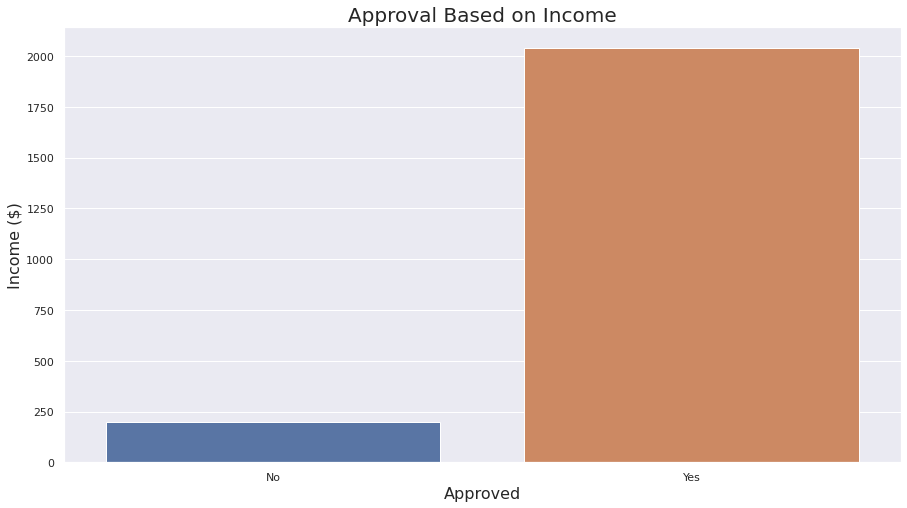

In [173]:
# Approval Based in Income

ax = sns.barplot(y, X['Income'],
                 ci= 0);

plt.title('Approval Based on Income', fontsize= 20);
plt.xlabel('Approved', fontsize= 16);
plt.ylabel('Income ($)', fontsize= 16);
plt.xticks([0,1],['No', 'Yes']);


This graph shows prospective applicants that an income above $ 250 will approve you for a credit card. Below that amount, there is a chance the applicant may get denied for a credit card.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


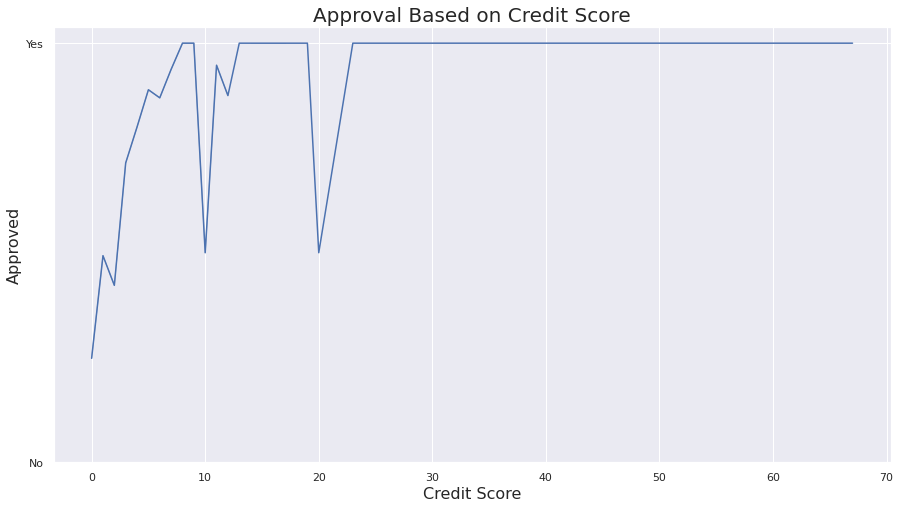

In [175]:
# Approval based on Credit Score

ax = sns.lineplot(X['CreditScore'],y,
                 ci = 0);

plt.title('Approval Based on Credit Score', fontsize= 20);
plt.xlabel('Credit Score', fontsize= 16);
plt.ylabel('Approved', fontsize= 16);
plt.yticks([0,1],['No', 'Yes']);

This line graph shows prospective applicants the chances of approval based on the credit score. It shows us that passed a scaled credit score of 2, the chances of getting approved for a credit card are pretty high.